In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Simpson from book p.234
def Simpson(f, a, b, epsilon, level, level_max):
    level = level + 1
    h = b - a
    c = (a + b)/2
    one_simpson = h*(f(a) + 4*f(c) + f(b))/6
    d = (a + c)/2
    e = (c + b)/2
    two_simpson = h*(f(a) + 4*f(d) + 2*f(c) + 4*f(e) + f(b))/12
    if level >= level_max:
        simpson_result = two_simpson
        print("maximum level reached")
    else:
        if np.abs(two_simpson - one_simpson) < 15*epsilon:
            simpson_result = two_simpson + (two_simpson - one_simpson)/15
        else:
            left_simpson = Simpson(f,a,c,e/2,level,level_max)
            right_simpson = Simpson(f,c,b,e/2,level,level_max)
            simpson_result = left_simpson + right_simpson
    return simpson_result

In [3]:
#test integral
def f(x):
    return np.cos(2*x)/np.exp(x)
a = 0
b = (5/4) * np.pi
epsilon = (1/2)*(10**-3)
level = 0
level_max = 100
print(Simpson(f, a, b, epsilon, level, level_max))

0.20835692360050967


In [4]:
#Simpson with graphing
def Simpson(f, a, b, epsilon, level, level_max):
    level = level + 1
    h = b - a
    c = (a + b)/2
    one_simpson = h*(f(a) + 4*f(c) + f(b))/6
    d = (a + c)/2
    e = (c + b)/2
    two_simpson = h*(f(a) + 4*f(d) + 2*f(c) + 4*f(e) + f(b))/12
    XP.append(a)
    XP.append(b)
    XP.append(c)
    XP.append(d)
    XP.append(e)
    if level >= level_max:
        simpson_result = two_simpson
        print("maximum level reached")
    else:
        if np.abs(two_simpson - one_simpson) < 15*epsilon:
            simpson_result = two_simpson + (two_simpson - one_simpson)/15
        else:
            left_simpson = Simpson(f,a,c,epsilon/2,level,level_max)
            right_simpson = Simpson(f,c,b,epsilon/2,level,level_max)
            simpson_result = left_simpson + right_simpson
    return simpson_result

In [12]:
#test integral
def f(x):
    return np.cos(2*x)/np.exp(x)
a = 0
b = (5/4) * np.pi
epsilon = (1/2)*(10**-3)
level = 0
level_max = 5
XP = []
I = Simpson(f, a, b, epsilon, level, level_max)
XP = list(set(XP))
XP.sort()
PP = list(map(f,XP))
print(I)
rounded_XP = [round(num, 3) for num in XP]
rounded_PP = [round(num, 3) for num in PP]
print("x-values used by Simpson approximation:")
print(rounded_XP)
print("Corresponding f(x)-values used by Simpson approximation:")
print(rounded_PP)

0.20808808187162117
x-values used by Simpson approximation:
[0, 0.123, 0.245, 0.368, 0.491, 0.614, 0.736, 0.859, 0.982, 1.227, 1.473, 1.718, 1.963, 2.454, 2.945, 3.436, 3.927]
Corresponding f(x)-values used by Simpson approximation:
[1.0, 0.858, 0.69, 0.513, 0.34, 0.182, 0.047, -0.062, -0.143, -0.227, -0.225, -0.172, -0.099, 0.017, 0.049, 0.027, 0.0]


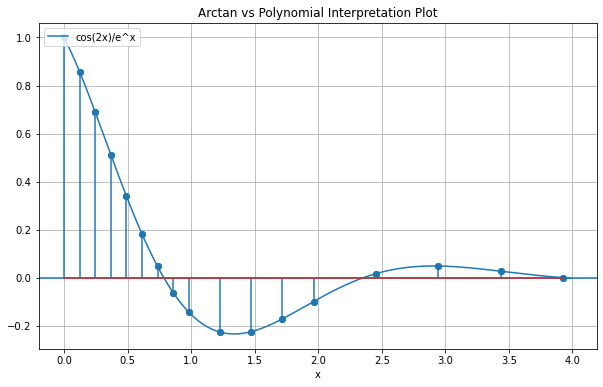

In [13]:
X = np.arange(0, 4, 0.01);
FVAL = np.cos(2*X)/np.exp(X)

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

ax1.plot(X,FVAL, label = 'cos(2x)/e^x')
ax1.scatter(XP,PP)


# Give a title for the sine wave plot
plt.title('Arctan vs Polynomial Interpretation Plot')

# Give x axis label for the sine wave plot
plt.xlabel('x')

# Give y axis label for the sine wave plot
plt.legend(loc='upper left')
plt.grid(True, which='both')
plt.axhline(y=0)
plt.stem(XP,PP)
plt.show()